In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
import warnings 
warnings.filterwarnings('ignore')

In [3]:
K_S_5 = pd.read_csv('../Data/K_S_5.csv', index_col = 0)
K_S_6 = pd.read_csv('../Data/K_S_6.csv', index_col = 0)
K_S_7 = pd.read_csv('../Data/K_S_7.csv', index_col = 0)
K_S_8 = pd.read_csv('../Data/K_S_8.csv', index_col = 0)
K_S_9 = pd.read_csv('../Data/K_S_9.csv', index_col = 0)
K_S_10 = pd.read_csv('../Data/K_S_10.csv', index_col = 0)

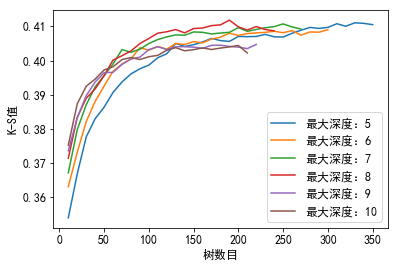

In [5]:
#plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 12
plt.plot(K_S_5.columns.astype(int), K_S_5.loc[5, :], label = '最大深度：5')
plt.plot(K_S_6.columns.astype(int), K_S_6.loc[6, :], label = '最大深度：6')
plt.plot(K_S_7.columns.astype(int), K_S_7.loc[7, :], label = '最大深度：7')
plt.plot(K_S_8.columns.astype(int), K_S_8.loc[8, :], label = '最大深度：8')
plt.plot(K_S_9.columns.astype(int), K_S_9.loc[9, :], label = '最大深度：9')
plt.plot(K_S_10.columns.astype(int), K_S_10.loc[10, :], label = '最大深度：10')
plt.xlabel('树数目')
plt.ylabel('K-S值')
plt.legend()
plt.show()

In [19]:
K_S = pd.read_csv('../Data/K-S.csv', index_col = 0)
K_S = K_S.iloc[:, :21]
K_S.columns = K_S.columns.astype('int')
K_S.head()

,10,20,30,40,50,60,70,80,90,100,...,120,130,140,150,160,170,180,190,200,210
5,0.354038,0.366887,0.377677,0.383032,0.386382,0.390713,0.393766,0.396128,0.397629,0.398700,...,0.402019,0.405050,0.404150,0.404668,0.405468,0.406509,0.405868,0.405643,0.407085,0.407021
6,0.363160,0.373220,0.382159,0.388103,0.392571,0.396912,0.399030,0.400510,0.403774,0.403056,...,0.403362,0.405010,0.404734,0.405574,0.405203,0.406344,0.406862,0.408036,0.407376,0.407936
7,0.367196,0.379846,0.387063,0.392336,0.395602,0.399047,0.403237,0.402453,0.403352,0.405018,...,0.406946,0.407536,0.407430,0.408401,0.408290,0.407817,0.408078,0.408301,0.409667,0.408578
8,0.371465,0.383391,0.389005,0.391738,0.395617,0.400177,0.401447,0.402843,0.405010,0.406497,...,0.408457,0.409112,0.408132,0.409387,0.409545,0.410246,0.410476,0.411848,0.409894,0.408957
9,0.373641,0.383281,0.389757,0.393753,0.396487,0.396580,0.398916,0.400470,0.401038,0.403229,...,0.403276,0.404069,0.404086,0.403947,0.403597,0.404481,0.404522,0.404157,0.403963,0.403527


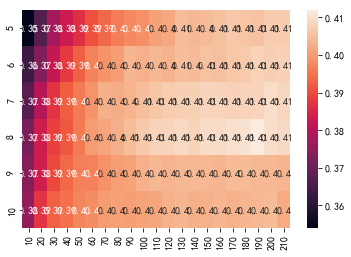

In [21]:
import seaborn as sns

sns.heatmap(K_S, annot = True)

In [56]:
x, y, z = [], [], []
for row in K_S.index:
    for col in K_S.columns:
        x.append(row)
        y.append(col)
        z.append(K_S.loc[row, col])

In [70]:
X, Y = np.meshgrid(K_S.columns, K_S.index)
X.shape

(6, 21)

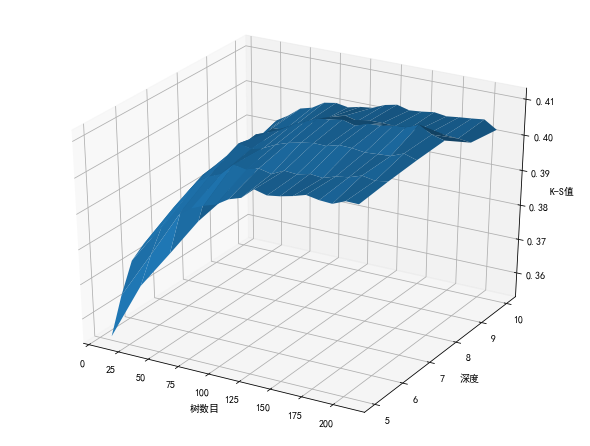

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(X, Y, K_S)
 
#设置坐标轴
ax.set_xlabel('树数目')
ax.set_ylabel('深度')
ax.set_zlabel('K-S值')
plt.show()

In [59]:
help(Axes3D)

Help on class Axes3D in module mpl_toolkits.mplot3d.axes3d:

class Axes3D(matplotlib.axes._axes.Axes)
 |  3D axes object.
 |  
 |  Method resolution order:
 |      Axes3D
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fig, rect=None, *args, azim=-60, elev=30, zscale=None, sharez=None, proj_type='persp', **kwargs)
 |      Build an axes in a figure.
 |      
 |      Parameters
 |      ----------
 |      fig : `~matplotlib.figure.Figure`
 |          The axes is build in the `.Figure` *fig*.
 |      
 |      rect : [left, bottom, width, height]
 |          The axes is build in the rectangle *rect*. *rect* is in
 |          `.Figure` coordinates.
 |      
 |      sharex, sharey : `~.axes.Axes`, optional
 |          The x or y `~.matplotlib.axis` is shared with the x or
 |          y axis in the input `~.axes.Axes`.
 |      
 |      frameon : bool, optio

In [46]:
help(ax)

Help on Axes3DSubplot in module matplotlib.axes._subplots object:

class Axes3DSubplot(SubplotBase, mpl_toolkits.mplot3d.axes3d.Axes3D)
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      Axes3DSubplot
 |      SubplotBase
 |      mpl_toolkits.mplot3d.axes3d.Axes3D
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |

48
32


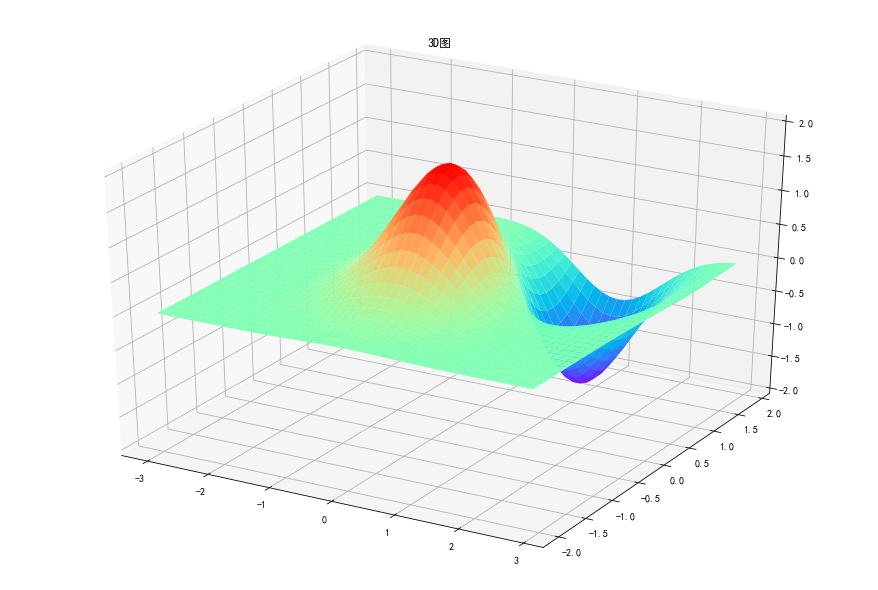

In [68]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.125
# 生成代表X轴数据的列表
x = np.arange(-3.0, 3.0, delta)
print(len(x))
# 生成代表Y轴数据的列表
y = np.arange(-2.0, 2.0, delta)
print(len(y))
# 对x、y数据执行网格化
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
# 计算Z轴数据（高度数据）
Z = (Z1 - Z2) * 2
# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
ax.set_zlim(-2, 2)
# 设置标题
plt.title("3D图")
plt.show()

In [67]:
print(X.shape)
print(Y.shape)
Z.shape


(32, 48)
(32, 48)


(32, 48)

# 5

Acc_5 = pd.read_csv('../Data/Acc_5.csv', index_col = 0)
plt.plot(Acc_5.columns, Acc_5.loc[5, :])

K_S_5 = pd.read_csv('../Data/K_S_5.csv', index_col = 0)
plt.plot(K_S_5.columns, K_S_5.loc[5, :])

# 6

Acc_6 = pd.read_csv('../Data/Acc_6.csv', index_col = 0)
plt.plot(Acc_6.columns, Acc_6.loc[6, :])

K_S_6 = pd.read_csv('../Data/K_S_6.csv', index_col = 0)
plt.plot(K_S_6.columns, K_S_6.loc[6, :])

# 7

Acc_7 = pd.read_csv('../Data/Acc_7.csv', index_col = 0)
plt.plot(Acc_7.columns, Acc_7.loc[7, :])

K_S_7 = pd.read_csv('../Data/K_S_7.csv', index_col = 0)
plt.plot(K_S_7.columns, K_S_7.loc[7, :])

# 8

Acc_8 = pd.read_csv('../Data/Acc_8.csv', index_col = 0)
plt.plot(Acc_8.columns, Acc_8.loc[8, :])

K_S_8 = pd.read_csv('../Data/K_S_8.csv', index_col = 0)
plt.plot(K_S_8.columns, K_S_8.loc[8, :])

In [2]:
K_S_5 = pd.read_csv('../Data/K_S_5.csv', index_col = 0)
K_S_6 = pd.read_csv('../Data/K_S_6.csv', index_col = 0)
K_S_7 = pd.read_csv('../Data/K_S_7.csv', index_col = 0)
K_S_8 = pd.read_csv('../Data/K_S_8.csv', index_col = 0)
K_S_9 = pd.read_csv('../Data/K_S_9.csv', index_col = 0)
K_S_10 = pd.read_csv('../Data/K_S_10.csv', index_col = 0)

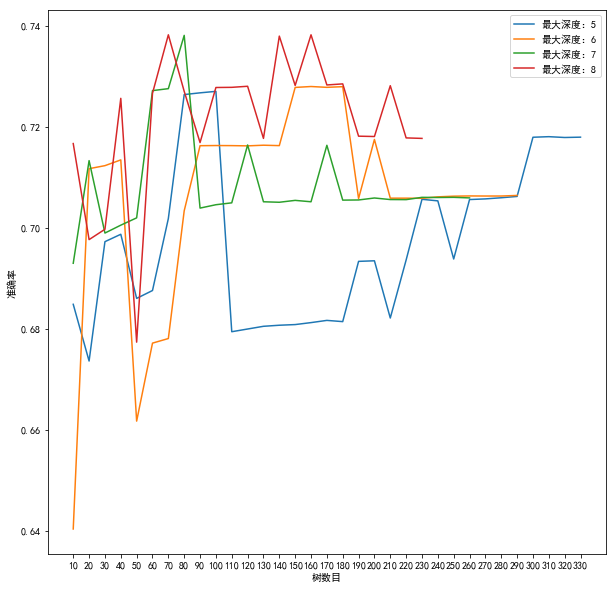

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(Acc_5.columns, Acc_5.loc[5, :], label = '最大深度：5')
plt.plot(Acc_6.columns, Acc_6.loc[6, :], label = '最大深度：6')
plt.plot(Acc_7.columns, Acc_7.loc[7, :], label = '最大深度：7')
plt.plot(Acc_8.columns, Acc_8.loc[8, :], label = '最大深度：8')
plt.xlabel('树数目')
plt.ylabel('准确率')
plt.legend()

In [13]:
Acc = pd.read_csv('../Data/Acc.csv', index_col = 0)
Acc

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
5,0.684812,0.673577,0.697218,0.698681,0.685983,0.687544,0.701803,0.726355,0.726696,0.726989,0.679381,0.679918,0.680455,0.680666,0.680796,0.681186,0.681625,0.681381,0.693316,0.693430
6,0.640310,0.711673,0.712274,0.713412,0.661675,0.677121,0.678032,0.703332,0.716225,0.716258,0.716241,0.716193,0.716323,0.716241,0.727769,0.727948,0.727786,0.727916,0.705754,0.717461
7,0.692942,0.713266,0.698925,0.700486,0.701933,0.727135,0.727525,0.738078,0.703868,0.704535,0.704909,0.716372,0.705120,0.705023,0.705396,0.705120,0.716307,0.705445,0.705478,0.705868
8,0.716648,0.697625,0.699673,0.725607,0.677317,0.726615,0.738192,0.726989,0.716843,0.727753,0.727786,0.727997,0.717672,0.737931,0.728160,0.738192,0.728257,0.728469,0.718111,0.718046


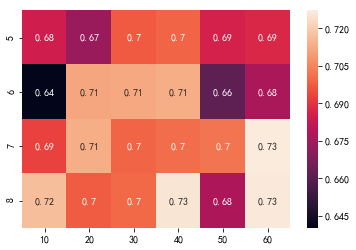

In [14]:
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

sns.heatmap(Acc.iloc[:, :6], annot = True)

In [15]:
data_fig = []
for x in Acc.index:
    for y in Acc.columns:
        d = [int(x), int(y), Acc.loc[x, y]]
        data_fig.append(d)
        
data_fig

[[5, 10, 0.6848121229999999],
 [5, 20, 0.6735768990000001],
 [5, 30, 0.697218022],
 [5, 40, 0.698681365],
 [5, 50, 0.685982798],
 [5, 60, 0.6875436970000001],
 [5, 70, 0.7018031640000001],
 [5, 80, 0.7263548120000001],
 [5, 90, 0.726696259],
 [5, 100, 0.7269889270000001],
 [5, 110, 0.679381494],
 [5, 120, 0.679918053],
 [5, 130, 0.680454612],
 [5, 140, 0.6806659840000001],
 [5, 150, 0.6807960590000001],
 [5, 160, 0.681186284],
 [5, 170, 0.681625287],
 [5, 180, 0.6813813959999999],
 [5, 190, 0.693315773],
 [5, 200, 0.6934295890000001],
 [6, 10, 0.640310229],
 [6, 20, 0.711672601],
 [6, 30, 0.712274198],
 [6, 40, 0.713412354],
 [6, 50, 0.66167504],
 [6, 60, 0.6771214409999999],
 [6, 70, 0.6780319659999999],
 [6, 80, 0.703331545],
 [6, 90, 0.716225225],
 [6, 100, 0.7162577440000001],
 [6, 110, 0.7162414840000001],
 [6, 120, 0.716192706],
 [6, 130, 0.7163227809999999],
 [6, 140, 0.7162414840000001],
 [6, 150, 0.727769377],
 [6, 160, 0.72794823],
 [6, 170, 0.7277856359999999],
 [6, 180, 0.7

In [16]:
xs = [data_fig[i][0] for i in range(len(data_fig))]
ys = [data_fig[i][1] for i in range(len(data_fig))]
zs = [data_fig[i][2] for i in range(len(data_fig))]

Text(0.5, 0, 'Z Label')

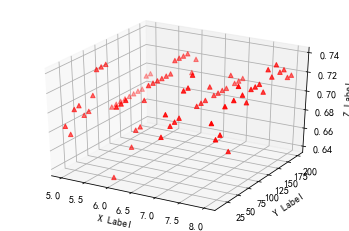

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
ax = plt.figure().add_subplot(111, projection = '3d')
#基于ax变量绘制三维图
#xs表示x方向的变量
#ys表示y方向的变量
#zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示
#m表示点的形式，o是圆形的点，^是三角形（marker)
#c表示颜色（color for short）
ax.scatter(xs, ys, zs, c = 'r', marker = '^') #点为红色三角形
 
#设置坐标轴
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


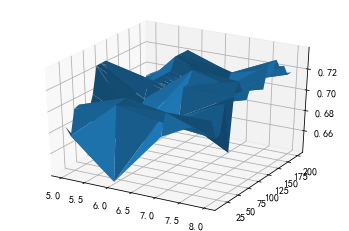

In [18]:
ax = plt.figure().add_subplot(111, projection = '3d')
ax.plot_trisurf(xs, ys, zs)
plt.show()

In [102]:
data = pd.read_csv(r'E:\39.106.5.217\MachineLearning\HomeCreditDefaultRisk\Data\app_merged_train.csv', 
                   usecols = ['AMT_ANNUITY', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'TARGET'])
data.head()

,AMT_ANNUITY,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,24700.5,-637,0.262949,0.139376,1
1,35698.5,-1188,0.622246,NaN,0
2,6750.0,-225,0.555912,0.729567,0
3,29686.5,-3039,0.650442,NaN,0
4,21865.5,-3038,0.322738,NaN,0


In [109]:
x_col = 'DAYS_EMPLOYED'
bins = 1000
x, y = [], []
x_max = data[x_col].max()
x_min = data[x_col].min()
for i in range(bins):
    x_b = x_min + i * (x_max - x_min) / bins
    x_u = x_min + (i + 1) * (x_max - x_min) / bins
    try:
        y.append(data[(data[x_col] >= x_b) & (data[x_col] < x_u) & (data['TARGET'] == 1)].shape[0] / 
                 data[(data[x_col] >= x_b) & (data[x_col] < x_u)].shape[0])
        x.append(x_min + i * (x_max - x_min) / bins)
    except:
        pass

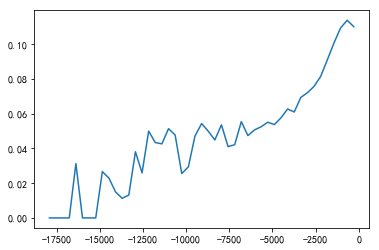

In [110]:
plt.plot(x, y)
plt.show()

In [94]:
print(x[np.argmax(y)])
x[np.argmax(y) + 1]

127256.4


127769.22

In [39]:
#data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mean(), inplace = True)
#data['EXT_SOURCE_3'].fillna(data['EXT_SOURCE_3'].mean(), inplace = True)

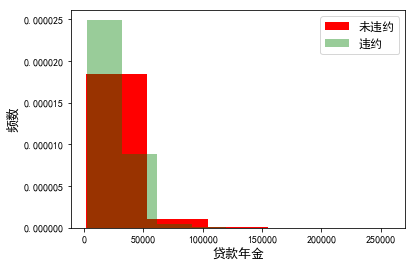

In [72]:
fig, ax = plt.subplots()
ax.hist(data[data['TARGET'] == 0]['AMT_ANNUITY'], bins = 5, normed = True, color = 'red', alpha = 1, label = '未违约')
ax.hist(data[data['TARGET'] == 1]['AMT_ANNUITY'], bins = 5, normed = True, color = 'green', alpha = 0.4, label = '违约')
ax.set_xlabel('贷款年金', fontsize = 13)
ax.set_ylabel('频数', fontsize = 13)
plt.legend(fontsize = 12)
plt.show()

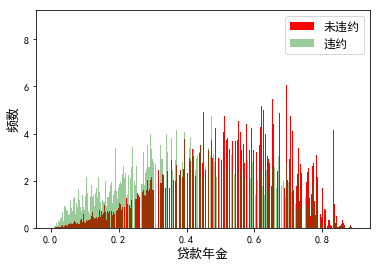

In [63]:
fig, ax = plt.subplots()
ax.hist(data[data['TARGET'] == 0]['EXT_SOURCE_3'], bins = 1000, normed = True, color = 'red', alpha = 1, cumulative = False, label = '未违约')
ax.hist(data[data['TARGET'] == 1]['EXT_SOURCE_3'], bins = 1000, normed = True, color = 'green', alpha = 0.4, label = '违约')
ax.set_xlabel('贷款年金', fontsize = 13)
ax.set_ylabel('频数', fontsize = 13)
plt.legend(fontsize = 12)
plt.show()

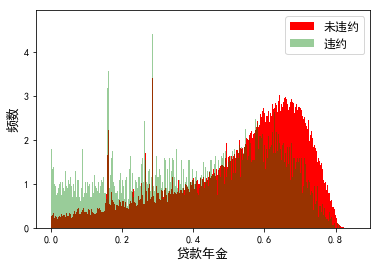

In [61]:
fig, ax = plt.subplots()
ax.hist(data[data['TARGET'] == 0]['EXT_SOURCE_2'], bins = 1000, normed = True, color = 'red', alpha = 1, cumulative = False, label = '未违约')
ax.hist(data[data['TARGET'] == 1]['EXT_SOURCE_2'], bins = 1000, normed = True, color = 'green', alpha = 0.4, label = '违约')
ax.set_xlabel('贷款年金', fontsize = 13)
ax.set_ylabel('频数', fontsize = 13)
plt.legend(fontsize = 12)
plt.show()

In [70]:
data[data['TARGET'] == 0]['AMT_ANNUITY'].value_counts()

9000.0      5869
13500.0     5202
6750.0      2125
10125.0     1906
37800.0     1490
11250.0     1391
26217.0     1309
12375.0     1270
20250.0     1239
22500.0     1188
31653.0     1161
16875.0     1151
36459.0     1075
26640.0      988
33025.5      893
26446.5      863
23773.5      832
26316.0      800
22018.5      751
21906.0      740
7875.0       700
25537.5      675
27000.0      664
15750.0      649
33750.0      634
32602.5      630
19867.5      628
31261.5      622
40320.0      609
21775.5      589
            ... 
73593.0        1
55197.0        1
6754.5         1
80068.5        1
87957.0        1
51075.0        1
105588.0       1
3060.0         1
57042.0        1
64543.5        1
54342.0        1
82890.0        1
109809.0       1
73512.0        1
80329.5        1
40162.5        1
80293.5        1
40144.5        1
73521.0        1
80275.5        1
106452.0       1
75438.0        1
80203.5        1
80194.5        1
54949.5        1
54967.5        1
55012.5        1
3415.5        